#### EDA NEWS CLASSIFICATION REVIEWS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import missingno as msno
import csv
import os
import sys

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [2]:
json_df = pd.read_json(r"D:\Open Classroom\Datasets\News Category Dataset\News_Category_Dataset_v2.json", lines = True)
json_df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [3]:
json_df.to_csv(r"D:\Open Classroom\Datasets\News Category Dataset\News_Category_Dataset_v2.csv")

#### Load Dataset

In [4]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\News Category Dataset\News_Category_Dataset_v2.csv")
df.head()

,Unnamed: 0,category,headline,authors,link,short_description,date
0,0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


#### Dataset Statistical Info

In [5]:
df.shape

(200853, 7)

In [6]:
round(df.describe())

,Unnamed: 0
count,200853.0
mean,100426.0
std,57981.0
min,0.0
25%,50213.0
50%,100426.0
75%,150639.0
max,200852.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         200853 non-null  int64 
 1   category           200853 non-null  object
 2   headline           200847 non-null  object
 3   authors            164233 non-null  object
 4   link               200853 non-null  object
 5   short_description  181141 non-null  object
 6   date               200853 non-null  object
dtypes: int64(1), object(6)
memory usage: 10.7+ MB


#### Data Cleaning

In [8]:
df.isnull().sum()

Unnamed: 0               0
category                 0
headline                 6
authors              36620
link                     0
short_description    19712
date                     0
dtype: int64

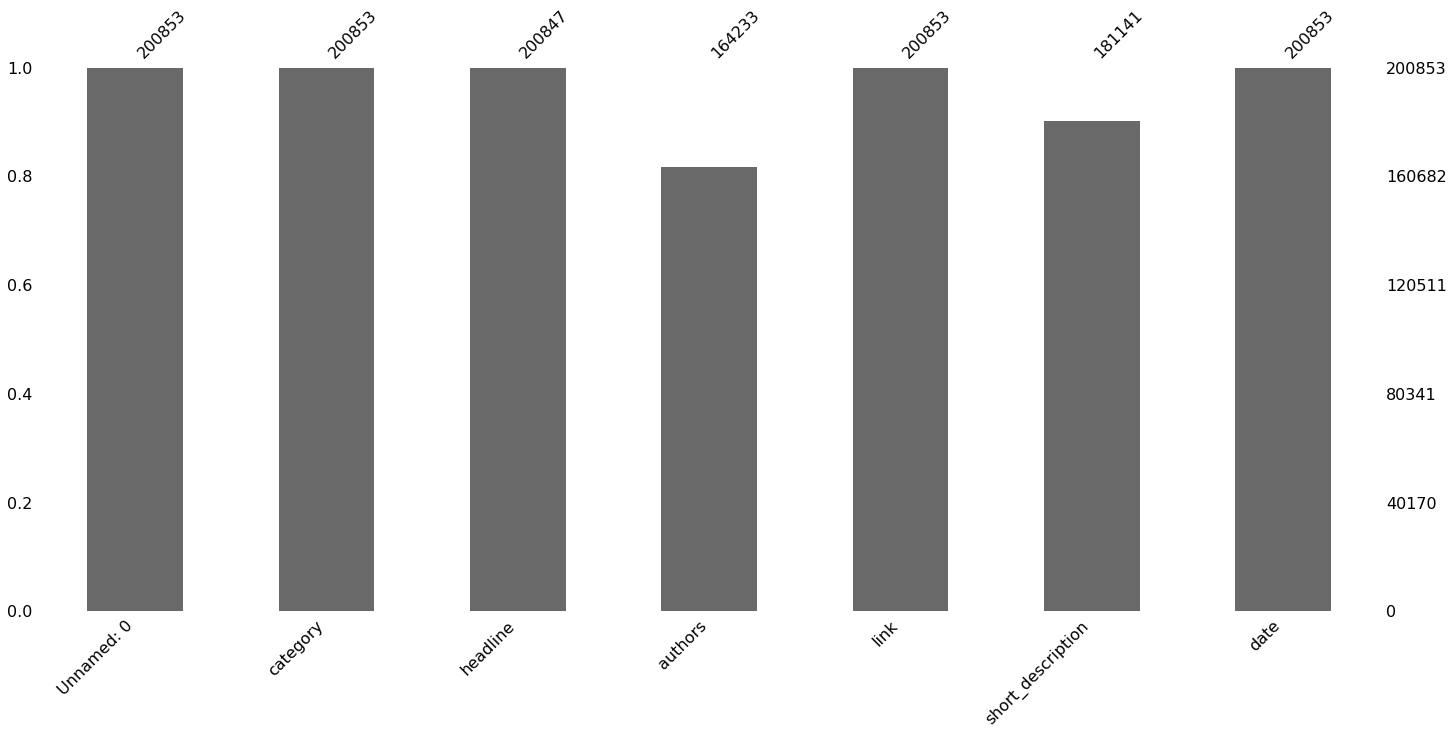

In [9]:
msno.bar(df)

In [10]:
new_df = pd.DataFrame(df)
new_df.drop(columns = ["Unnamed: 0", "authors", "link"], inplace = True)

In [11]:
new_df.head()

,category,headline,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [12]:
new_df.to_csv(r"D:\Open Classroom\Datasets\News Category Dataset\Cleaned_News_Category_Dataset_v2.csv")

In [13]:
clean_df = pd.read_csv(r"D:\Open Classroom\Datasets\News Category Dataset\Cleaned_News_Category_Dataset_v2.csv")
clean_df.drop(columns = ["Unnamed: 0"], inplace=True)
clean_df.head()

,category,headline,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [14]:
clean_df.shape

(200853, 4)

In [15]:
clean_df.dropna(axis = "index", how = "any", inplace = True)
clean_df.shape

(181140, 4)

#### One-Hot Encoding

In [16]:
le = LabelEncoder()

clean_df["category_num"] = le.fit_transform(clean_df["category"])

In [17]:
clean_df.head()

,category,headline,short_description,date,category_num
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,2018-05-26,6
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,2018-05-26,10
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,10
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,10
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,10


#### Train and Test Vocabulary of the Dataset

In [18]:
x = clean_df["headline"]
y = clean_df["category_num"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=4)

In [19]:
print("x_train -->", x_train.shape)
print("x_test -->", x_test.shape)
print("y_train -->", y_train.shape)
print("y_test -->", y_test.shape)

x_train --> (144912,)
x_test --> (36228,)
y_train --> (144912,)
y_test --> (36228,)


#### Vectorization

Fitting to Learn the Vocabulary and Transforming the vocabulary to a document-term matrix

In [20]:
vect = CountVectorizer()

x_train_vect = vect.fit_transform(x_train.astype('U'))

In [21]:
x_train_vect

<144912x48929 sparse matrix of type '<class 'numpy.int64'>'
	with 1339057 stored elements in Compressed Sparse Row format>

x_train_vect has 
. 160182 number of Observation 
. 50906 number of Tokens / Features

In [22]:
x_test_vect = vect.fit_transform(x_test.astype('U'))

In [23]:
x_test_vect

<36228x27353 sparse matrix of type '<class 'numpy.int64'>'
	with 335301 stored elements in Compressed Sparse Row format>

x_test_vect has
40171 number of Observations and 28616 number of Tokens

#### Build and Evaluate Model

1. Decision Tree Classifier

In [24]:
dt_model = DecisionTreeClassifier()

In [25]:
%time dt_model.fit(x_train_vect, y_train)

Wall time: 4min 3s


DecisionTreeClassifier()

In [26]:
pred = dt_model.predict(x_train_vect)
print(pred)

[30 37 18 ... 37 35 21]


In [27]:
accuracy = accuracy_score(y_train, pred)
%time accuracy*100

Wall time: 0 ns


99.93720326819036

2. Support Vector Machines

In [28]:
sv_model = SVC()
sv_model.fit(x_train_vect, y_train)

SVC()

In [29]:
sv_pred = sv_model.predict(x_train_vect)
sv_pred

array([30, 37, 18, ..., 37, 35, 37])

In [31]:
sv_accuracy = accuracy_score(y_train, sv_pred)
%time sv_accuracy*100

Wall time: 0 ns


81.30520591807442